### 문제1

공장에서는 진공관 수명이 1만 시간이라고 주장하여 품질관리팀에서 12개 샘플을 뽑았음. 유의수준 5%에서 부호 검정하시오. 12개 샘플의 수명은 8800, 9500, 9600, 10500, 10400, 9600, 10300, 9500, 9600, 7100,10100,7200 이다
1. 연구가설 귀무가설 작성(5)

In [1]:
import pandas as pd
import numpy as np
data=[8800, 9500, 9600, 10500, 10400, 9600, 10300, 9500, 9600, 7100,10100,7200]

In [2]:
data

[8800, 9500, 9600, 10500, 10400, 9600, 10300, 9500, 9600, 7100, 10100, 7200]

- 귀무가설 : 진공관 수명이 1만시간이다.
- 대립가설 : 진공관 수명이 1만시간이 아니다.

In [3]:
s_mean=np.mean(data)
u_var=np.var(data, ddof=1)

In [4]:
#정규성 검정
import scipy.stats as stats
from scipy.stats import shapiro
shapiro(data)

ShapiroResult(statistic=0.8105747699737549, pvalue=0.012388509698212147)

pvalue가 0.05보다 작으므로 귀무가설을 기각한다. 즉 정규분포를 따르지 않는다.

따라서 윌콕슨 부호순위 검정 진행

2. 유효한 샘플의 수를 계산(5)

부호순위검정에서 중위수와 같은 관측치는 유효하지 않으므로 제외한다.

In [5]:
median=np.median(data)
median

9600.0

In [6]:
from collections import Counter
Counter(data)

Counter({8800: 1,
         9500: 2,
         9600: 3,
         10500: 1,
         10400: 1,
         10300: 1,
         7100: 1,
         10100: 1,
         7200: 1})

중위수인 9600이 3개 존재하므로 유효한 샘플수는 9개이다.

In [7]:
#중위수 삭제
while 9600 in data:
    data.remove(9600)

In [8]:
data=np.array(data)

3. 검정통계량 및 연구가설 채택 여부 작성(5)

In [9]:
mean0=10000
data
stats.wilcoxon(data-mean0, alternative='two-sided')

WilcoxonResult(statistic=11.0, pvalue=0.203125)

귀무가설을 기각할 수 없다. 즉, 진공관 수명시간은 1만시간이다.

### 문제2
공장에서는 시제품의 농도가 60이라고 주장하며 품질관리팀에서 10개의 샘플을 뽑았다. 유의수준 5%에서 다음을 검정하시오.

-귀무가설 : 시제품의 농도는 60이다.

-대립가설 : 시제품의 농도는 60이 아니다.

In [10]:
data=[52,50,62,75,26,45,62,35,57,14]
data

[52, 50, 62, 75, 26, 45, 62, 35, 57, 14]

2. 유효한 샘플 수를 계산하시오.

In [11]:
median=np.median(data)
median

51.0

In [12]:
from collections import Counter
Counter(data)

Counter({52: 1, 50: 1, 62: 2, 75: 1, 26: 1, 45: 1, 35: 1, 57: 1, 14: 1})

In [13]:
#중위수 삭제
while 51 in data:
    data.remove(51)

In [14]:
data

[52, 50, 62, 75, 26, 45, 62, 35, 57, 14]

In [15]:
data=np.array(data)

3. 검정통계량을 구하고 연구가설 채택 여부를 작성하시오.

In [16]:
mean0=60
stats.wilcoxon(data-mean0, alternative='two-sided')

WilcoxonResult(statistic=9.5, pvalue=0.064453125)

검정통계량은 9.5이고 p-value가 0.05보다 크기때문에 귀무가설을 기각할 수 없다. 즉 시제품의 농도는 60이다.

### 문제3
광고횟수(X1) : 1 2 3 4 5 7 8 9 11 12

광고비(X2) : (낮음, 낮음, 낮음, 낮음, 높음, 높음, 높음, 높음, 높음, 높음) 

매출액(Y) : 15 16 17 18 20 22 24 26 28 29 

1. 광고비 변수를 가변수 처리 후 다중회귀를 수행하여 회귀계수가 유의한지 검정.

In [17]:
data=pd.DataFrame({'광고횟수':[1,2,3,4,5,7,8,9,11,12], '광고비':['낮음','낮음','낮음','낮음','높음','높음','높음','높음','높음','높음'], '매출액':[15,16,17,18,20,22,24,26,28,29]})

In [18]:
data=pd.get_dummies(data)

In [19]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
model=smf.ols(formula="매출액 ~ 광고횟수+광고비_낮음+광고비_높음", data=data)
result=model.fit()
result.summary()

C:\Users\taeeu\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     545.4
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           2.07e-08
Time:                        21:18:21   Log-Likelihood:                -4.6455
No. Observations:                  10   AIC:                             15.29
Df Residuals:                       7   BIC:                             16.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9551      0.294     30.473      0.000       8.260       9.650
광고횟수           1.2957      0.074     17.431      0.000       1.120       1.471
광고비_낮음         4.3058      0.189     22.786      0.000       3.859       4.753
광고비_높음         4.6493      0.396     11.747      0.000       3.713       5.585
==============================================================================
Omnibus:                        0.263   Durbin-Watson:                   1.465
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.099
Skew:                           0.157   Prob(JB):                        0.951
Kurtosis:                       2.625   Cond. No.                     8.11e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.01e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

회귀계수에 대한 통계량은 t값이며, p-value가 0.05보다 작으면 회귀계수가 통계적으로 유의하다고 할 수 있다.

변수인 광고횟수와 광고비 모두 p-value값이 0.05보다 작아 회귀계수가 통계적으로 유의하다고 할 수 있다.

2. 회귀식이 유의한지 판단.

선형회귀모형의 통계량은 F통계량을 사용한다. F통계량의 p-value가 유의수준보다 작으면 회귀계수가 통계적으로 유의하다고 할 수 있다.

H0 회귀모형은 유의하지 않다.

H1 회귀모형은 유의하다.

In [20]:
result.summary()

C:\Users\taeeu\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     545.4
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           2.07e-08
Time:                        21:18:21   Log-Likelihood:                -4.6455
No. Observations:                  10   AIC:                             15.29
Df Residuals:                       7   BIC:                             16.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9551      0.294     30.473      0.000       8.260       9.650
광고횟수           1.2957      0.074     17.431      0.000       1.120       1.471
광고비_낮음         4.3058      0.189     22.786      0.000       3.859       4.753
광고비_높음         4.6493      0.396     11.747      0.000       3.713       5.585
==============================================================================
Omnibus:                        0.263   Durbin-Watson:                   1.465
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.099
Skew:                           0.157   Prob(JB):                        0.951
Kurtosis:                       2.625   Cond. No.                     8.11e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.01e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

F통계량의 p-value값이 0.05보다 작으므로 귀무가설을 기각한다. 회귀모형은 유의하다.

### 문제4
H0 : 두 모평균 사이의 차이는 없다(동일)

H1 : 두 모평균 사이의 차이는 있다(유의미한 차이가 있다)

In [21]:
x=5.28
y=5.54
분모=(0.5**2/12)+(0.3**2/12)
t=(x-y)/(np.sqrt(분모))

In [22]:
분모2=(0.4**4/12**2*11)+(0.3**4/12**2*11)
df=분모**2/분모2
df

0.3118424602104127

In [23]:
rv=stats.t(df=df)
t
#t값이 0보다 작음

-1.5446301670436107

In [24]:
p=(1-rv.cdf(t))*2
p

1.4005635240166319

귀무가설이 0.05보다 크므로 귀무가설을 기각할 수 없다. 즉 두 공장 부품 생산라인 모평균 사이의 차이는 없다.

### 문제5
학과와 성적이 관계가 있는지 검정하시오.

1. 귀무가설, 대립가설을 작성하시오.

H0 : 학과와 성적은 독립이다.

H1 : 학과와 성적은 독립이 아니다.

2. 학과와 성적이 독립일 때 기댓값 구하시오.

In [25]:
data=pd.DataFrame({'index':["1.5-2.5", "2.5-3.5", "3.5-4.5"], "사회과학":[15,60,24], "자연과학":[25,69,6], "공학":[10, 77,14]})
data.set_index("index", inplace=True)
data

,사회과학,자연과학,공학
index,,,
1.5-2.5,15,25,10
2.5-3.5,60,69,77
3.5-4.5,24,6,14


In [26]:
#세로합
사회과학, 자연과학, 공학=data.sum()
사회과학, 자연과학, 공학

(99, 100, 101)

In [27]:
#가로합
A,B,C=data.sum(axis=1)
A,B,C

(50, 206, 44)

In [28]:
n=사회과학+자연과학+공학
n

300

In [29]:
ad_ef=pd.DataFrame({'사회과학':[A*사회과학/n, B*사회과학/n, C*사회과학/n], '자연과학':[A*자연과학/n, B*자연과학/n, C*자연과학/n], '공학':[A*공학/n, B*공학/n, C*공학/n]}, index=["1.5-2.5", "2.5-3.5", "3.5-4.5"])

In [30]:
ad_ef

,사회과학,자연과학,공학
1.5-2.5,16.50,16.666667,16.833333
2.5-3.5,67.98,68.666667,69.353333
3.5-4.5,14.52,14.666667,14.813333


3. 검정통계량 구하고 귀무가설/대립가설 채택여부 작성

In [31]:
y=((data-ad_ef)**2/ad_ef).sum().sum()
y

20.213713780910307

In [32]:
rv=stats.chi2(1)
1-rv.cdf(y)

6.925467610718883e-06

p-value가 0.05보다 작아 귀무가설을 기각한다. 즉 학과와 성적은 독립이 아니다

### 문제 6
모집단에서 표본을 추출한 데이터 9개가 다음과 같다.


3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7


※ z(0.05) = 1.64, z(0.025) = 1.96, t(0.05, 8) =  1.86, t(0.025, 8) = 2.31


1. 주어진 데이터의 95% 신뢰구간을 구하라

In [33]:
#정규분포라고 가정하고 t분포로 구함..
data=[3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]
n=9
rv=stats.t(df=n-1)
s_mean=np.mean(data)
u_var=np.var(data, ddof=1)
lcl=s_mean-2.31*np.sqrt(u_var/n)
ucl=s_mean+2.31*np.sqrt(u_var/n)
lcl,ucl

(3.4770208544679377, 4.30075692330984)

2. sigma = 0.04인걸 알고 있을 때의 95% 신뢰구간을 구하라 

In [34]:
#정규분포라고 가정하고 모표준편차(시그마)=0.05, 모분산(시그마제곱)=0.04**2
rv=stats.norm()
p_var=0.04**2
lcl=s_mean-1.96*np.sqrt(p_var/n)
ucl=s_mean+1.96*np.sqrt(p_var/n)
lcl, ucl

(3.8627555555555557, 3.915022222222222)

### 문제 7
코로나 진단키트의 검사 결과표이다. 유병률은 0.01로 알려져있다.

진단키트 검사 결과 양성일 때, 실제로 코로나에 감염되었을 확률을 구하시오.

In [35]:
#코로나에 감염되었을 확률(유병률)=0.01
data=pd.DataFrame({"양성판정":[370,10],"음성판정":[15,690]}, index=['감염', '비감염'])
data

,양성판정,음성판정
감염,370,15
비감염,10,690


In [36]:
#양성이고 감염인 확률
a=0.01*370/(370+15)
#양성이고 비감염인 확률
b=0.99*10/(10+690)
#검사결과가 양성일 때 실제로 감염일 확률
a/(a+b)

0.4045926735921268

### 문제8
A생산라인, B생산라인 각각에서 12개의 제품을 샘플로 뽑았다. A생산라인 제품 평균은 5.7mm이고 표준편차는 0.03, B생산라인의 제품 평균은 5.6mm이고 표준편차는 0.04이다. 5%유의수준에서 두 제품의 평균의 차이가 있는지 검정해라.

1. 귀무가설, 대립가설을 작성하시오.

H0: A생산라인과 B생산라인 사이의 차이는 없다.

H1: A생산라인과 B생산라인 사이의 차이는 있다.

In [38]:
np.random.seed(seed=100)
#A생산라인, 평균 5.7, 표준편차 0.03
A_norm = np.random.normal(5.7, 0.03, size=12)
#B생산라인, 평균 5.6, 표준편차 0.04
B_norm = np.random.normal(5.6, 0.04, size=12)

In [47]:
#등분산검정
stats.levene(A_norm, B_norm)
#0.05보다 크므로 귀무가설을 기각할 수 없다. 즉 등분산 equal_var=True

LeveneResult(statistic=2.425903961880092, pvalue=0.13361436688572148)

In [48]:
stats.ttest_ind(A_norm, B_norm, equal_var=True)

Ttest_indResult(statistic=7.256781182641071, pvalue=2.863800030174915e-07)

p-value가 0.05보다 작으므로 귀무가설을 기각한다. 즉 A생산라인 평균과 B생산라인 평균 사이의 유의미한 차이가 있다.

### 문제9 - 크루스칼윌리스
H0 : x,y,z 공장의 중앙값은 서로 같다.

H1 : x,y,z 공장의 중앙값이 전부 같은 것은 아니다.

In [70]:
import pandas as pd
from scipy.stats import kruskal

a = [35, 41, 45, 42, 33, 36, 47, 45, 31, 32, 40, 44]
b = [40, 38, 44, 48, 45, 46, 42, 39, 40, 41, 38, 47]
c = [30, 34, 38, 39, 40, 41, 38, 37, 40, 41, 39, 38]

# Kruskal-Wallis H 검정 분석
print(kruskal(a, b, c))

KruskalResult(statistic=6.047476974964328, pvalue=0.04861911622342764)


In [72]:
# 생산량 평균 순위 출력
data = pd.DataFrame(a+b+c)
data["생산량순위"] = data.rank(ascending=False)
data["공장이름"] = ''
data["공장이름"][0:12] = "a"
data["공장이름"][12:24] = "b"
data["공장이름"][24:36] = "c"
data

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_19336/2153764857.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["공장이름"][0:12] = "a"
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_19336/2153764857.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["공장이름"][12:24] = "b"
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_19336/2153764857.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["공장이름"][

,0,생산량순위,공장이름
0,35,31.0,a
1,41,13.5,a
2,45,6.0,a
3,42,10.5,a
4,33,33.0,a
5,36,30.0,a
6,47,2.5,a
7,45,6.0,a
8,31,35.0,a
9,32,34.0,a


In [73]:
print(data.groupby("공장이름").mean())

              0  생산량순위
공장이름                  
a     39.250000   19.0
b     42.333333   13.0
c     37.916667   23.5


즉, 3개의 철근 생산량을 모두 동일하지 않으며, 그 중에서도 공장 3의 평균 생산량 순위가 가장 낮음을 알 수 있다.

### 문제9-2. 크루스칼 윌리스
X, Y, Z 공장 생산품 무게 중앙값이 같은지 검정, 생산량데이터와 공장별 표본의 무게별 순위이다.(크루스컬 월리스 공장순위데이터 문제)

In [83]:
from PIL import Image
image = Image.open("다운로드.png")

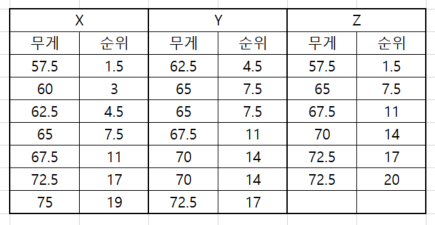

In [84]:
image

In [85]:
x=[57.5, 60, 62.5, 65, 67.5, 72.5, 75]
y=[62.5, 65, 65, 67.5, 70, 70, 72.5]
z=[57.5, 65, 67.5, 70, 72.5, 72.5]

In [86]:
print(kruskal(x, y, z))
# p-value가 0.05보다 크기때문에 귀무가설을 기각할 수 없다. 즉 x,y,z의 중앙값은 같다.

KruskalResult(statistic=0.5031868131868121, pvalue=0.7775608249098129)


In [87]:
data = pd.DataFrame(x+y+z)
data["생산량순위"] = [1.5, 3, 4.5, 7.5, 11, 17, 19, 4.5, 7.5, 7.5, 11, 14,14,17, 1.5, 7.5, 11, 14,17,20]
data

,0,생산량순위
0,57.5,1.5
1,60.0,3.0
2,62.5,4.5
3,65.0,7.5
4,67.5,11.0
5,72.5,17.0
6,75.0,19.0
7,62.5,4.5
8,65.0,7.5
9,65.0,7.5


In [88]:
data['공장이름']=""
data["공장이름"][0:7] = "a"
data["공장이름"][7:14] = "b"
data["공장이름"][14:20] = "c"
data

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_19336/477519872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["공장이름"][0:7] = "a"
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_19336/477519872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["공장이름"][7:14] = "b"
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_19336/477519872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["공장이름"][14:20

,0,생산량순위,공장이름
0,57.5,1.5,a
1,60.0,3.0,a
2,62.5,4.5,a
3,65.0,7.5,a
4,67.5,11.0,a
5,72.5,17.0,a
6,75.0,19.0,a
7,62.5,4.5,b
8,65.0,7.5,b
9,65.0,7.5,b


In [89]:
print(data.groupby("공장이름").mean())

              0      생산량순위
공장이름                      
a     65.714286   9.071429
b     67.500000  10.785714
c     67.500000  11.833333


만약 기각했을 경우라면 공장x,y,z의 중앙값은 다르고 그중에서도 특히 공장c의 평균생산량 순위가 가장 낮다.